In [1]:
#Bibliotecas essenciais :
import numpy as np # cálculos numéricos
import pandas as pd # visualização de dados
import seaborn as sns # plotagem de gráficos
import matplotlib
import matplotlib.pyplot as plt # criação de gráficos

# Vamos iniciar com a abertura  do banco de dados disponibilizado pela World Health Organization.
# Siga esse link : https://covid19.who.int/

In [4]:
dados_covid = pd.read_csv('Covid-global-semana3.csv')
dados_covid_br = dados_covid
dados_covid_br.columns = ["Dia", "UF", "País", "Região", "Mortes", "Mortes_Acumula", "Confirmados", "Confirmados_Acumula"]
dados_br = dados_covid_br[dados_covid_br['País']=="Brazil"]
dados_br

,Dia,UF,País,Região,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
1929,2020-02-26,BR,Brazil,AMRO,0,0,1,1
1930,2020-02-27,BR,Brazil,AMRO,0,0,0,1
1931,2020-02-28,BR,Brazil,AMRO,0,0,0,1
1932,2020-02-29,BR,Brazil,AMRO,0,0,0,1
1933,2020-03-01,BR,Brazil,AMRO,0,0,1,2
...,...,...,...,...,...,...,...,...
2006,2020-05-13,BR,Brazil,AMRO,396,11519,5632,168331
2007,2020-05-14,BR,Brazil,AMRO,881,12400,9258,177589
2008,2020-05-15,BR,Brazil,AMRO,749,13149,11385,188974
2009,2020-05-16,BR,Brazil,AMRO,844,13993,13944,202918


## Vamos agora apagar algumas colunas consideradas ' desnecessárias ' para nossa análise (UF; País e Região). 

In [5]:
dados_covid_br = dados_br.drop(['UF', 'País', 'Região'], axis=1)
dados_covid_br

,Dia,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
1929,2020-02-26,0,0,1,1
1930,2020-02-27,0,0,0,1
1931,2020-02-28,0,0,0,1
1932,2020-02-29,0,0,0,1
1933,2020-03-01,0,0,1,2
...,...,...,...,...,...
2006,2020-05-13,396,11519,5632,168331
2007,2020-05-14,881,12400,9258,177589
2008,2020-05-15,749,13149,11385,188974
2009,2020-05-16,844,13993,13944,202918


# Como a análise é semanal, usaremos apenas os dados produzidos nos útimos dias;

In [6]:
dados_semanais = dados_covid_br.tail(7)
dados_semanais

,Dia,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
2004,2020-05-11,730,10627,10611,155939
2005,2020-05-12,496,11123,6760,162699
2006,2020-05-13,396,11519,5632,168331
2007,2020-05-14,881,12400,9258,177589
2008,2020-05-15,749,13149,11385,188974
2009,2020-05-16,844,13993,13944,202918
2010,2020-05-17,824,14817,15305,218223


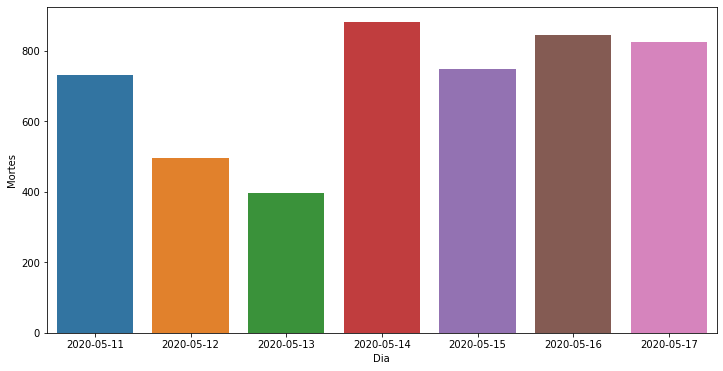

<Figure size 1296x576 with 0 Axes>

In [10]:
# Para vermos a representação gráfica da variavel 'Mortes'
sns.barplot(x='Dia', y='Mortes', ci=None,data=dados_semanais) 
fig = plt.figure(figsize=(18,8))

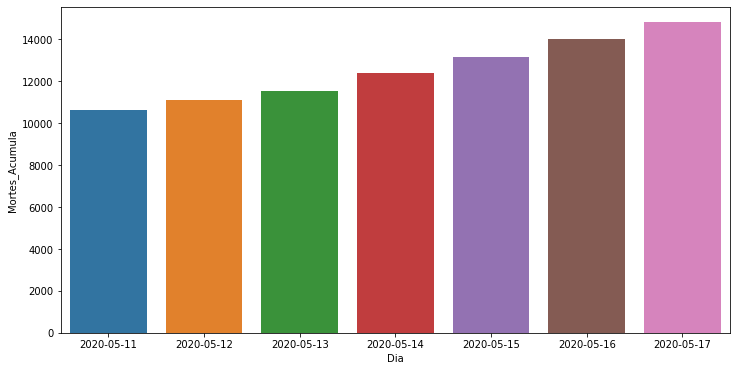

<Figure size 1296x576 with 0 Axes>

In [11]:
sns.barplot(x='Dia', y='Mortes_Acumula', ci=None,data=dados_semanais) 
fig = plt.figure(figsize=(18,8))

### Vejamos agora os resultados com os infectados!

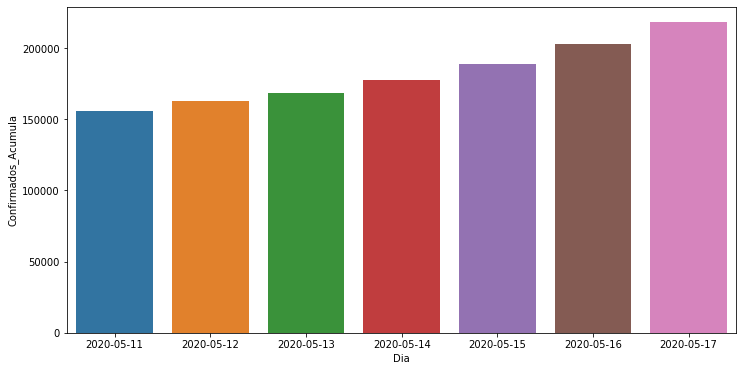

<Figure size 1296x576 with 0 Axes>

In [12]:
sns.barplot(x='Dia', y='Confirmados_Acumula', ci=None, data=dados_semanais) 
fig = plt.figure(figsize=(18,8))

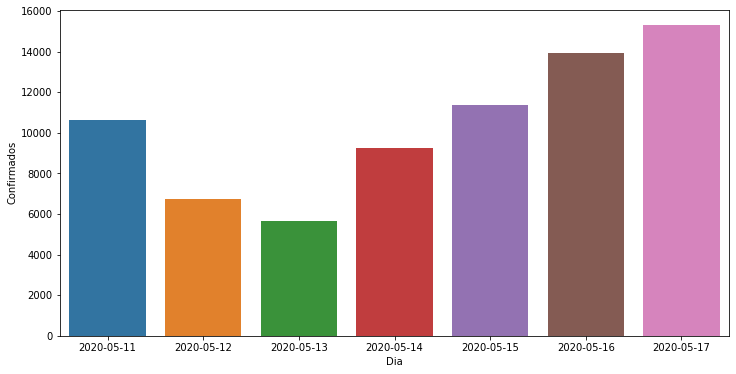

<Figure size 1296x576 with 0 Axes>

In [15]:
sns.barplot(x='Dia', y='Confirmados', ci=None, data=dados_semanais)
fig = plt.figure(figsize=(18,8))

## Ok, vejamos brevemente uma correlação entre os dados!

<Figure size 1080x360 with 0 Axes>

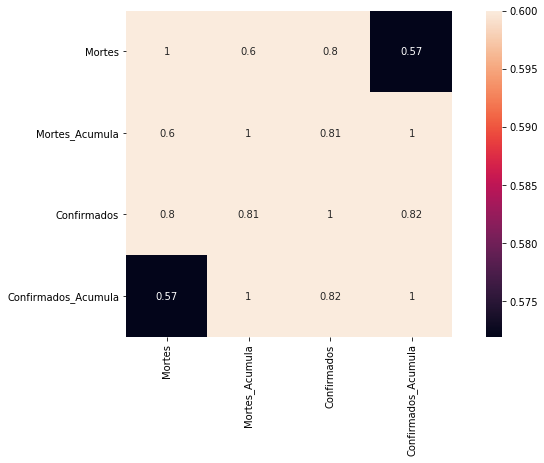

<Figure size 1080x360 with 0 Axes>

In [18]:
sns.heatmap(dados_semanais.corr(), vmax=0.6, square=True, annot=True)
plt.figure(figsize=(15,5))

## Ok, não cooperou muito, tentemos outra abordagem!

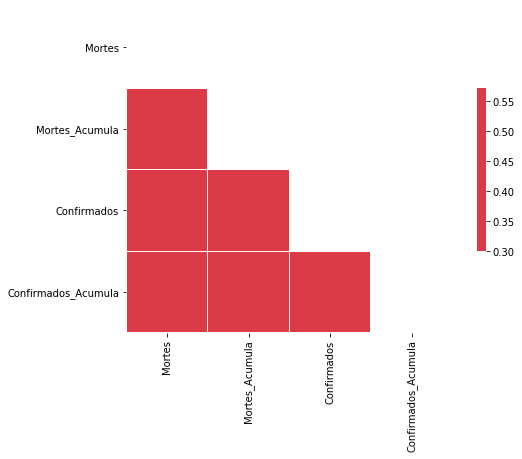

In [20]:
from string import ascii_letters

mask = np.triu(np.ones_like(dados_semanais.corr(), dtype=np.bool))
f, ax = plt.subplots(figsize=(9, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(dados_semanais.corr(), mask=mask, cmap=cmap,
            vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Ok, ainda sim não fica muito bem claro a relação entre os dados...
## Voltemos a plotagem de gráficos para +1 análise de variável específica!

In [22]:
dados_semanais

,Dia,Mortes,Mortes_Acumula,Confirmados,Confirmados_Acumula
2004,2020-05-11,730,10627,10611,155939
2005,2020-05-12,496,11123,6760,162699
2006,2020-05-13,396,11519,5632,168331
2007,2020-05-14,881,12400,9258,177589
2008,2020-05-15,749,13149,11385,188974
2009,2020-05-16,844,13993,13944,202918
2010,2020-05-17,824,14817,15305,218223


Text(0.5, 0.98, ' Plotando variável (Mortes) do DataFrame (dados_semanais) ')

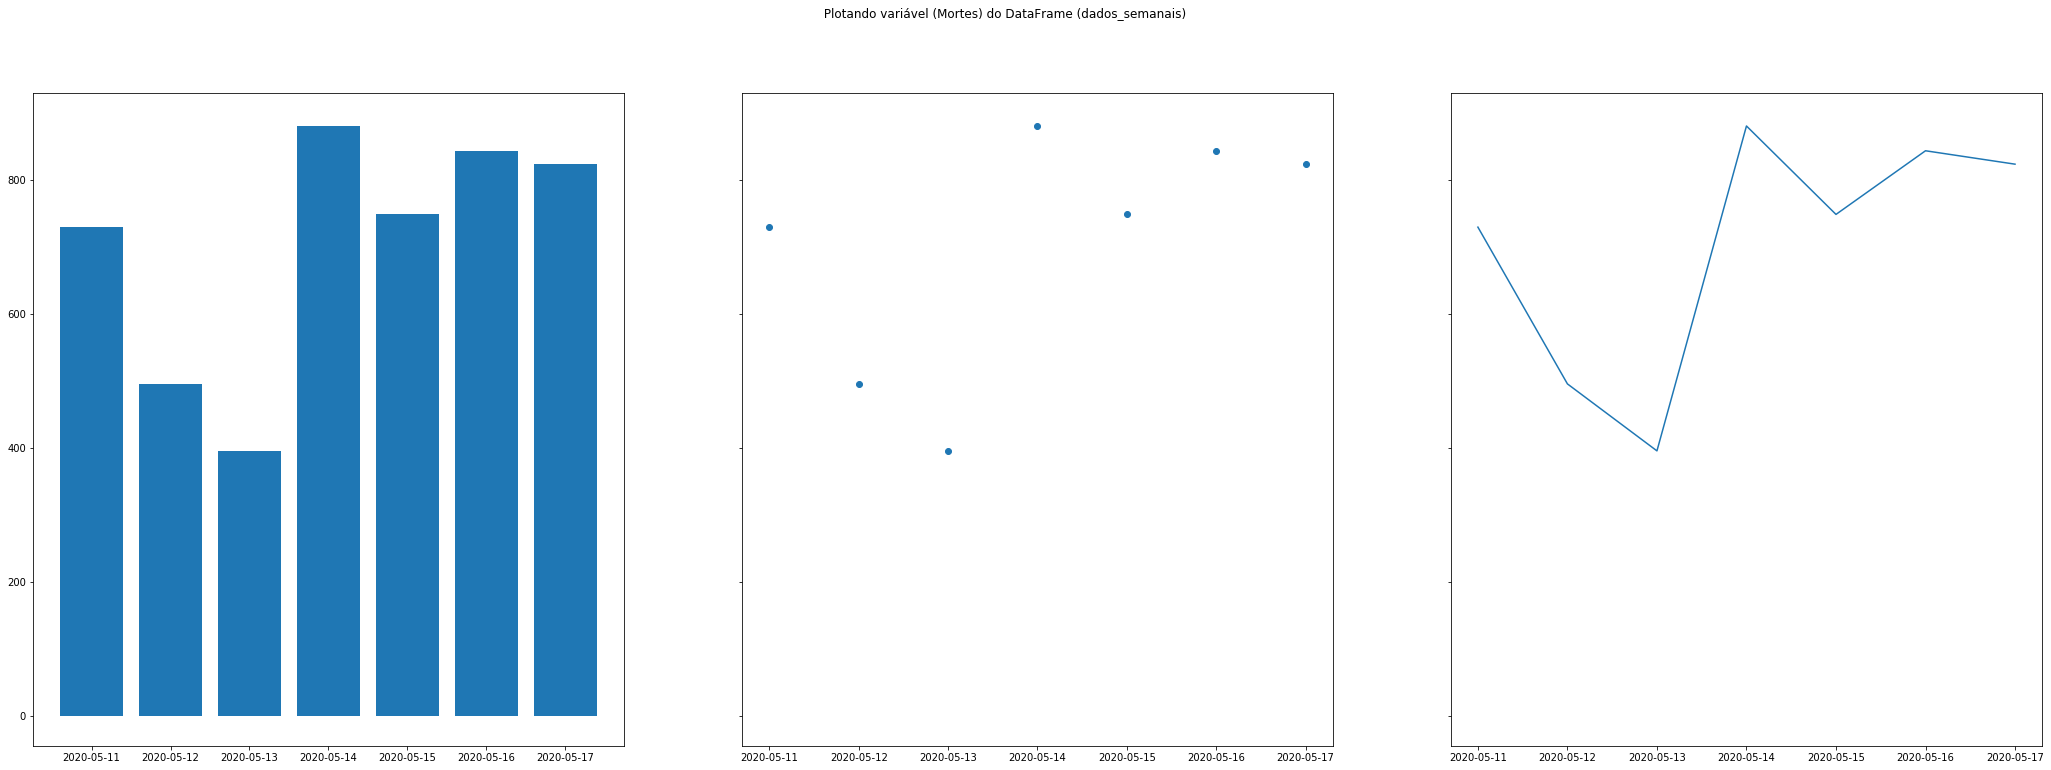

In [23]:
dados ={"2020-05-11" : 730, "2020-05-12" : 496, "2020-05-13" : 396, 
        "2020-05-14" : 881, "2020-05-15" : 749, "2020-05-16" : 844, 
        "2020-05-17" : 824}
nomes = list(dados.keys())
valores = list(dados.values())
width = 0.35

fig, axs = plt.subplots(1,3, figsize=(36,12), sharey=True)
axs[0].bar(nomes, valores)
axs[1].scatter(nomes, valores)
axs[2].plot(nomes, valores)
fig.suptitle(' Plotando variável (Mortes) do DataFrame (dados_semanais) ')

Text(0.5, 0.98, ' Plotando variável (Confirmados) do DataFrame (dados_semanais) ')

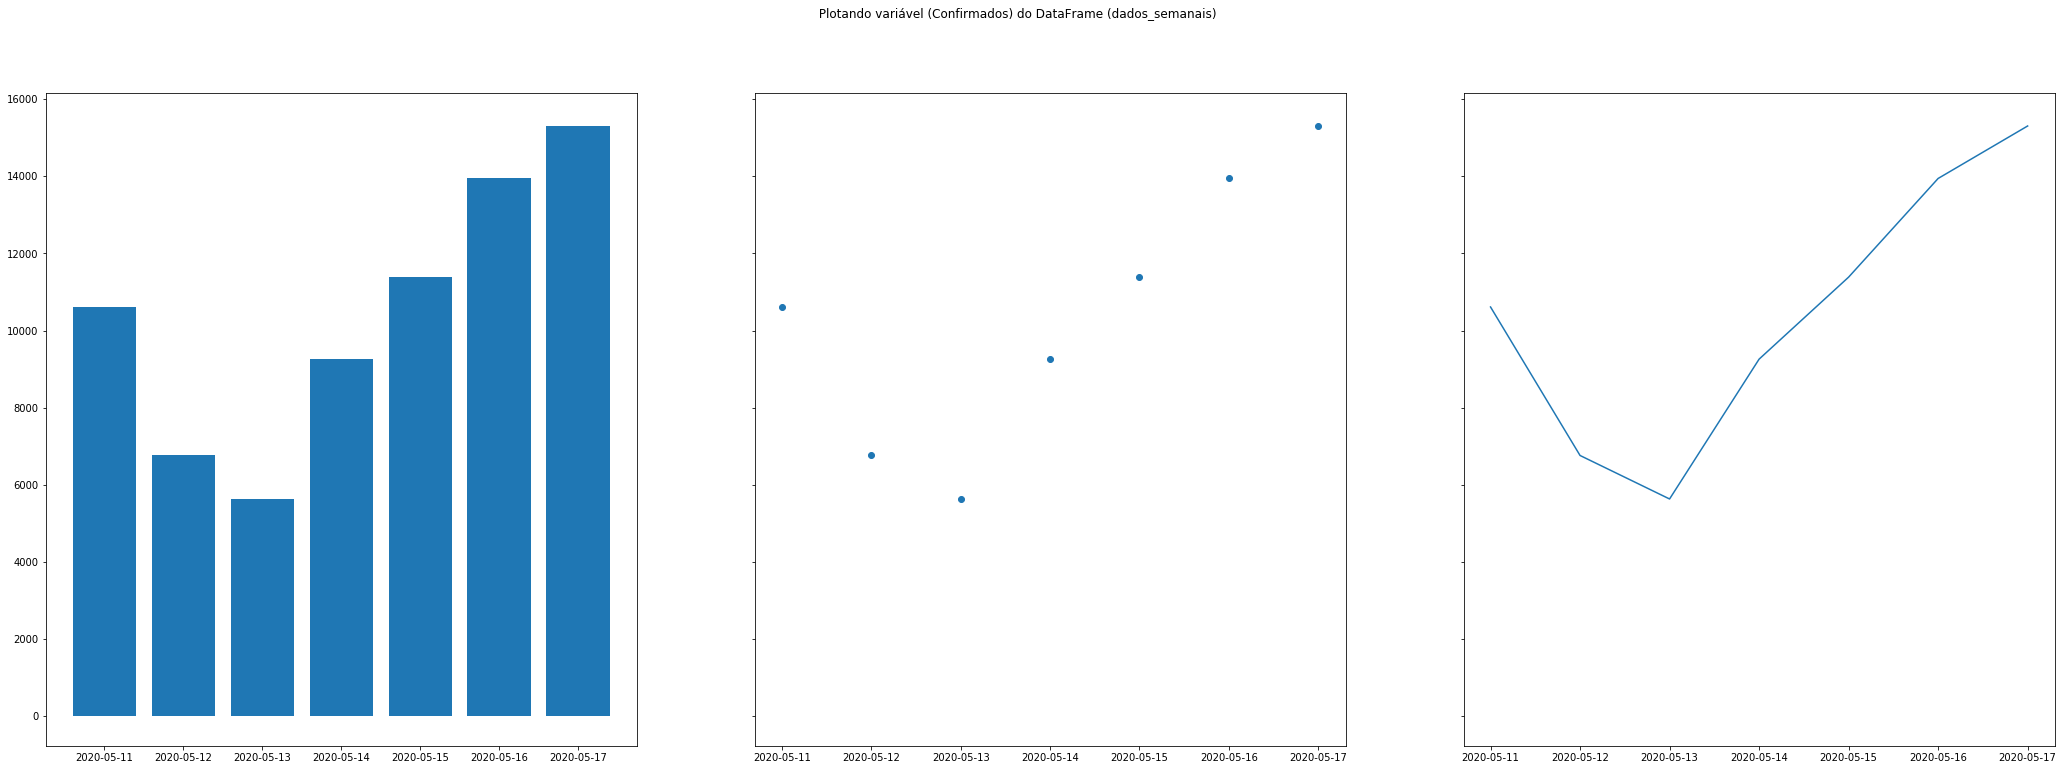

In [27]:
dados ={"2020-05-11" : 10611, "2020-05-12" : 6760, "2020-05-13" : 5632, 
        "2020-05-14" : 9258, "2020-05-15" : 11385, "2020-05-16" : 13944, 
        "2020-05-17" : 15305}
nomes = list(dados.keys())
valores = list(dados.values())
width = 0.35

fig, axs = plt.subplots(1,3, figsize=(36,12), sharey=True)
axs[0].bar(nomes, valores)
axs[1].scatter(nomes, valores)
axs[2].plot(nomes, valores)
fig.suptitle(' Plotando variável (Confirmados) do DataFrame (dados_semanais) ')

## Disso, podemos concluir que o número de confirmados e o de óbitos estão se comportando de maneira semelhar; quando um sofre um leve queda, a  outra variável tende a se portar de tal forma!

<Figure size 1080x360 with 0 Axes>

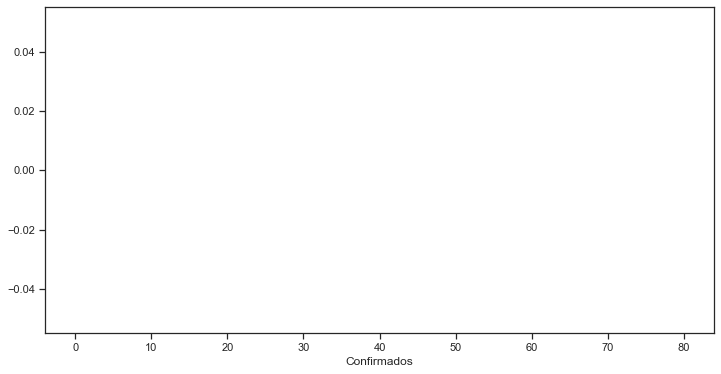

<Figure size 1080x360 with 0 Axes>

In [33]:
sns.distplot(dados_semanais['Mortes'], bins=range(0, 81, 1), kde=False, color='blue')
sns.distplot(dados_semanais['Confirmados'], bins=range(0, 81, 1), kde=False, color='red', axlabel=dados_semanais['Dia'])
plt.figure(figsize=[15,5])